In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# PART 1 

In [5]:
#1)Load the given dataset
a=pd.read_csv(r"C:\Users\POOJA SINGHAL\Desktop\Fingertips\Machine Learning\Projects\Proj-1.csv")
a  #reading the data file in python

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,5.0,6.0,7,60000
3,2.0,10.0,10,65000
4,7.0,9.0,6,70000
5,3.0,7.0,10,62000
6,10.0,NaN,7,72000
7,11.0,7.0,8,80000


In [6]:
#2) #fillna() is used to fill up nan values with value
a.experience=a.experience.fillna(0)
a

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0.0,8.0,9,50000
1,0.0,8.0,6,45000
2,5.0,6.0,7,60000
3,2.0,10.0,10,65000
4,7.0,9.0,6,70000
5,3.0,7.0,10,62000
6,10.0,NaN,7,72000
7,11.0,7.0,8,80000


In [118]:
#3)Replace the Null values of the column test score with mean value
import math
mean_test_score=math.floor(a["test_score(out of 10)"].mean())
mean_test_score 

7

In [8]:
a["test_score(out of 10)"]=a["test_score(out of 10)"].fillna(mean_test_score)
a
#here we have filled up the test score nan value with mean value 7

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0.0,8.0,9,50000
1,0.0,8.0,6,45000
2,5.0,6.0,7,60000
3,2.0,10.0,10,65000
4,7.0,9.0,6,70000
5,3.0,7.0,10,62000
6,10.0,7.0,7,72000
7,11.0,7.0,8,80000


In [9]:
a.shape

(8, 4)

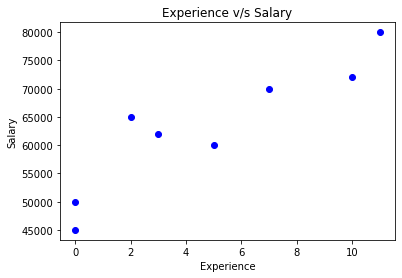

In [11]:
#4)Display a scatter plot between experience and Salary
plt.title("Experience v/s Salary")
plt.xlabel("Experience")
plt.ylabel("Salary")
X=a['experience']
Y=a['salary($)']
plt.scatter(X,Y, color='blue')
plt.show()

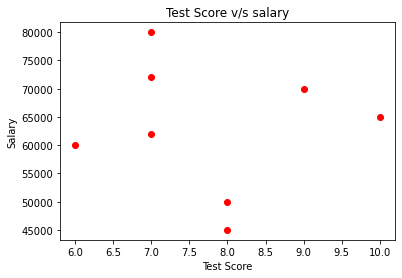

In [12]:
#5) Display a scatter plot between test score and Salary
plt.title("Test Score v/s salary")
plt.xlabel("Test Score")
plt.ylabel("Salary")
X=a['test_score(out of 10)']
Y=a['salary($)']
plt.scatter(X,Y, color='red')
plt.show()

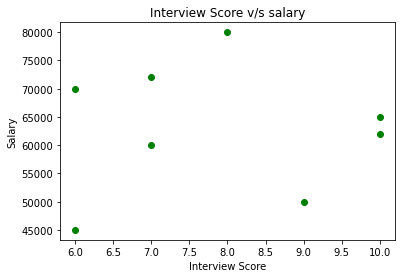

In [13]:
#6) Display a scatter plot between interview score and Salary
plt.title("Interview Score v/s salary")
plt.xlabel("Interview Score")
plt.ylabel("Salary")
X=a['interview_score(out of 10)']
Y=a['salary($)']
plt.scatter(X,Y,color='green')
plt.show()

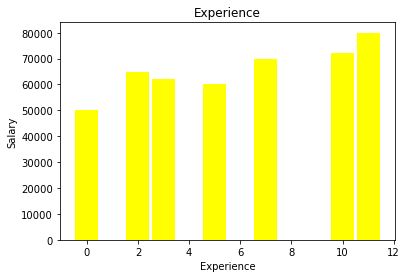

In [114]:
#7) Display bar plot for experience
plt.title("Experience")
plt.xlabel("Experience")
plt.ylabel("Salary")
X=a['experience']
Y=a['salary($)']
plt.bar(X,Y,color='yellow', width=0.9)  
plt.show()

# PART 2

In [35]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error,r2_score

In [79]:
X=a.iloc[:,0:3]
Y=a.iloc[:,-1].values  #here we have to separate the target data that is salary from the feature data. 

In [80]:
#1) Separate feature data from target data
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.8,random_state=10)

In [81]:
Y_train

array([72000, 80000, 50000, 70000, 62000, 45000], dtype=int64)

In [103]:
Y

array([50000, 45000, 60000, 65000, 70000, 62000, 72000, 80000],
      dtype=int64)

In [82]:
X_train

,experience,test_score(out of 10),interview_score(out of 10)
6,10,7.0,7
7,11,7.0,8
0,0,8.0,9
4,7,9.0,6
5,3,7.0,10
1,0,8.0,6


In [83]:
a["experience"]=a["experience"].astype(int)  #changed the datatype of the column

In [84]:
X

,experience,test_score(out of 10),interview_score(out of 10)
0,0,8.0,9
1,0,8.0,6
2,5,6.0,7
3,2,10.0,10
4,7,9.0,6
5,3,7.0,10
6,10,7.0,7
7,11,7.0,8


In [85]:
regression_model=LinearRegression()

In [86]:
regression_model.fit(X,Y) #this one nd down one are same 

LinearRegression()

In [87]:
regression_model.fit(a[['experience','test_score(out of 10)','interview_score(out of 10)']],a['salary($)'])

LinearRegression()

In [88]:
Y_test

array([60000, 65000], dtype=int64)

In [89]:
X_test

,experience,test_score(out of 10),interview_score(out of 10)
2,5,6.0,7
3,2,10.0,10


In [90]:
salary_pred1=regression_model.predict([[2,9,4]])  #[[]] is to be used for 2D array 
salary_pred1

array([49418.90163851])

In [91]:
salary_pred=regression_model.predict(X)
salary_pred

array([52090.46734071, 45648.01964161, 57964.2290839 , 64525.1061363 ,
       68325.21184635, 60783.44785255, 74796.8832586 , 79866.63483999])

In [115]:
regression_model.score(X_test,Y_test)

0.6504090076313551

In [117]:
regression_model.score(X_train,Y_train)

0.9814695199484762

In [101]:
rmse=mean_squared_error(Y,salary_pred)
r2 = r2_score(Y,salary_pred) 
print('Slope:' ,regression_model.coef_) 
print('Intercept:', regression_model.intercept_) 
print('Root mean squared error: ', rmse) 
print('R2 score: ', r2) 

Slope: [2922.26901502 2221.30909959 2147.48256637]
Intercept: 14992.651446693155
Root mean squared error:  2660640.909788418
R2 score:  0.9770139014273139
